### 접근
- 압축한 SCC를 기반으로 새로운 그래프를 구성한다.
  - set을 사용하면 될 것 같다.
- 진입 차수가 0인 노드를 시작점으로 가중치를 더한다.
  - SCC단위로 가중치의 합을 미리 구해놓는다.
- 이런, 문제를 읽어보니 시작지점은 정해져있었다.
  - 이러면 시작 지점을 기준으로 위상정렬 하면 될 것 같다
- 레스토링; 아무 레스토랑 중 하나를 그래프의 마지막으로 정할 수 있다는 의미인 것 같다.
- (고려) 최종 진입 지점이 레스토랑이 아니라면 그곳을 정답에 포함시키면 안된다.
- (고려) 시작지점의 진입 차수가 0이 아닐 수 있다. 이러면 위상정렬할 때 어떻게 되는걸까?
  - 처음의 아이디어를 이용하고 위상정렬 대신 BFS로 구현해보는 것으로 접근해본다. 진입차수는 계산하지 않는다.

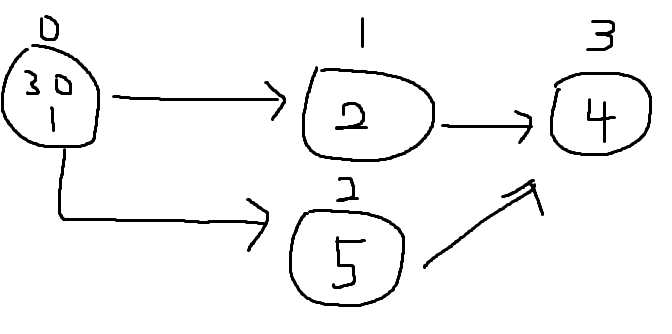

In [ ]:
import os, io
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def tarjan(G): #O(N+M)
  SCC, S, P = [], [], []
  D = [0] * len(G)
 
  s = [*range(len(G))]
  while s:
    x = s.pop()
    if x < 0:
      d = D[~x] - 1
      if P[-1] > d:
        SCC.append(S[d:])
        del S[d:], P[-1]
        for x in SCC[-1]:
          D[x] = -1
    elif D[x] > 0:
      while P[-1] > D[x]:
        P.pop()
    elif D[x] == 0:
      S.append(x)
      P.append(len(S))
      D[x] = len(S)
      s.append(~x)
      s += G[x]
  return SCC[::-1]

def sol():
  N, M = map(int, input().split())
  G = [[] for _ in range(N)]
  for _ in range(M):
    u, v = map(int, input().split())
    G[u-1].append(v-1)
  
  W = [0] * N
  for i in range(N):
    W[i] = int(input())

  SCC = {}
  for i, scc in enumerate(tarjan(G)): #O(1)만에 몇 번 SCC에 속하는지 찾을 수 있게 해싱한다. (O(N)
    for v in scc:
      SCC[v] = i 
  
  G2 = [set() for _ in range(i + 1)]
  for i, V in enumerate(G): 
    for v in V:
      if SCC[i] != SCC[v]: #즉 i번째 정점이 속한 압축 SCC 번호 a에서 v번째 정점이 속한 압축 SCC 번호로 가는 간선b가 있다면 = a -> b로 가는 간선
        G2[SCC[i]].add(SCC[v])
  print(G2)
  

  S, p = map(int, input().split())
  P = [*map(int, input().split())]

sol()

### 아이디어
- 새로 만든 그래프에 DP를 적용시킨다.
  - 그래프를 탐색하면서 가중치를 더해 나가면서, 현재의 가중치 누적 vs 해당 노드의 가중치를 비교해서 더 큰 값을 저장한다.
  - 이후 레스토랑인 노드를 보면서 가중치 합이 최대인 값을 출력하면 될 것 같다.

In [ ]:
import os, io, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def tarjan(G): #O(N+M)
  SCC, S, P = [], [], []
  D = [0] * len(G)
 
  s = [*range(len(G))]
  while s:
    x = s.pop()
    if x < 0:
      d = D[~x] - 1
      if P[-1] > d:
        SCC.append(S[d:])
        del S[d:], P[-1]
        for x in SCC[-1]:
          D[x] = -1
    elif D[x] > 0:
      while P[-1] > D[x]:
        P.pop()
    elif D[x] == 0:
      S.append(x)
      P.append(len(S))
      D[x] = len(S)
      s.append(~x)
      s += G[x]
  return SCC[::-1]

def sol():
  N, M = map(int, input().split())
  G = [[] for _ in range(N)]
  for _ in range(M):
    u, v = map(int, input().split())
    G[u-1].append(v-1)
  
  W = [0] * N
  for i in range(N):
    W[i] = int(input())

  SCC = {}
  SCC_W = []
  for i, scc in enumerate(tarjan(G)): 
    SCC_W.append(0)
    for v in scc:
      SCC[v] = i #O(1)만에 몇 번 SCC에 속하는지 찾을 수 있게 해싱한다. 
      SCC_W[i] += W[v]
  assert(i+1 == len(SCC_W))

  num_scc = i + 1
  G2 = [set() for _ in range(num_scc)]
  for u, V in enumerate(G): 
    for v in V:
      if SCC[u] != SCC[v]: #즉 u번째 정점이 속한 압축 SCC 번호 a에서 v번째 정점이 속한 압축 SCC 번호로 가는 간선b가 있다면 = a -> b로 가는 간선
        G2[SCC[u]].add(SCC[v])
  
  DP = [0] * num_scc #DP[i] i번째 SCC에서 획득할 수 있는 최대 현금의 액수
  S, p = map(int, input().split())
  P = [*map(int, input().split())] #레스토랑
  Q = [SCC[S-1]]
  DP[SCC[S-1]] = SCC_W[SCC[S-1]]
  while Q:
    x = Q.pop()
    for y in G2[x]:
      DP[y] = max(DP[y], DP[x] + SCC_W[y])
      Q.append(y)
  
  answer = 0
  for p in P: #p가 속한 SCC의 DP값을 구한다.
    answer = max(answer, DP[SCC[p-1]])
  sys.stdout.write(str(answer))

sol()

- 틀린건지 여부를 확인하기도 전에 TLE가 났다.
  - $O(N)$의 작업을 너무 많이 한 것과 새로만든 그래프의 연결정보가 매우 많게 입력될 수 있기 때문인 것 같다.
    - 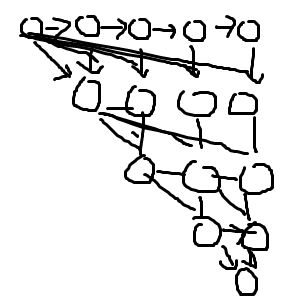
    - 이런 느낌으로 연결되면 최대 $\frac {N^2}{2}$개의 연결정보가 생길 수 있다.
  - 할만한 최적화를 한 것 같지만 이렇게 풀 순 없을 것 같다.

6 7
1 2
2 3
3 5
2 4
4 1
2 6
6 5
10
12
8
16
1
5
1 4
4 3 5 6
;;
10 1
1 2
1
2
3
4
5
6
7
8
9
10
1 4
2 6 7 8
;;
5 5
1 2
1 3
3 2
2 4
4 5
5
5
5
5
5
1 1
5
;;
8 8
1 2
2 3
3 4
3 7
7 8
1 5
5 6
6 8
1
1
1
10
1
100
1
1
2 8
1 2 3 4 5 6 7 8

In [ ]:
import sys, collections, io, os
sys.setrecursionlimit(1000000)
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

def dfs(G, S, u, vis):
  vis[u] = True
  for v in G[u]:
    if not vis[v]:
      dfs(G, S, v, vis)
  S.append(u)

def dfs2(G_r, adj, u, num, SCC_num, SCC_W, W):
  SCC_num[u] = num  #node가 속한 SCC 번호
  SCC_W[num] += W[u]
  for v in G_r[u]:
    if SCC_num[v] == -1:
      dfs2(G_r, adj, v, num, SCC_num, SCC_W, W)
    elif SCC_num[u] != SCC_num[v]:
      adj[SCC_num[v]].append(SCC_num[u])

def kosaraju(G, G_r, W):
  N = len(G)
  vis = [False] * N
  S = []
  SCC_num = [-1] * N
  SCC_W = []
  adj = []
  for i in range(N):
    if not vis[i]:
      dfs(G, S, i, vis)

  length = 0
  while S:
    u = S.pop()
    if SCC_num[u] == -1:
      adj.append([])
      SCC_W.append(0)
      dfs2(G_r, adj, u, length, SCC_num, SCC_W, W)
      length += 1
  return SCC_num, length, adj, SCC_W

def sol():
  N, M = map(int, input().split())
  G = [[] for _ in range(N)]
  G_r = [[] for _ in range(N)]
  for _ in range(M):
    u, v = map(int, input().split())
    G[u-1].append(v-1)
    G_r[v-1].append(u-1)
  
  W = []
  for _ in range(N):
    W.append(int(input()))

  SCC_num, length, G2, SCC_W = kosaraju(G, G_r, W)
  del G, G_r

  S, p = map(int, input().split())
  P = map(int, input().split()) #레스토랑
  
  DP = [0] * length #DP[i] i번째 SCC에서 획득할 수 있는 최대 현금의 액수
  DP[SCC_num[S-1]] = SCC_W[SCC_num[S-1]]
  Q = collections.deque([SCC_num[S-1]])
  while Q:
    x = Q.popleft()
    for y in G2[x]:
      if DP[y] >= DP[x] + SCC_W[y]: continue
      DP[y] = DP[x] + SCC_W[y]
      Q.append(y)
  
  answer = 0
  for p in P: #p가 속한 SCC의 DP값을 구한다.
    if answer >= DP[SCC_num[p-1]] : continue
    answer = DP[SCC_num[p-1]]
  sys.stdout.write(str(answer))

sol()

`W`의 입력이 꽤나 문제가 컸던 모양이다. 이렇게 푸니까 AC를 맞았다.